https://github.com/home-assistant/home-assistant/blob/dev/homeassistant/components/image_processing/opencv.py

http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import signal
%matplotlib inline

In [2]:
cv2.__version__

'3.4.0'

In [3]:
img = mpimg.imread('me.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

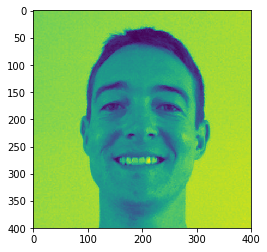

In [4]:
plt.imshow(gray);

External popup window with image

In [ ]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

External popup window with video

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Image classification 
Appear to need to init the classifier and manually load it..

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [5]:
face_cascade.load('/Users/robincole/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')

NameError: name 'face_cascade' is not defined

In [7]:
eye_cascade.load('/Users/robincole/anaconda3/share/OpenCV/haarcascades/haarcascade_eye.xml')

True

In [8]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

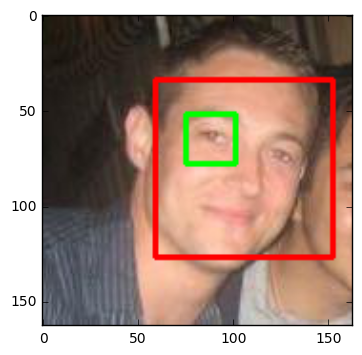

In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)

## Video

https://medium.com/@neotheicebird/webcam-based-image-processing-in-ipython-notebooks-47c75a022514

In [2]:
vc = cv2.VideoCapture(0)

In [3]:
plt.ion()

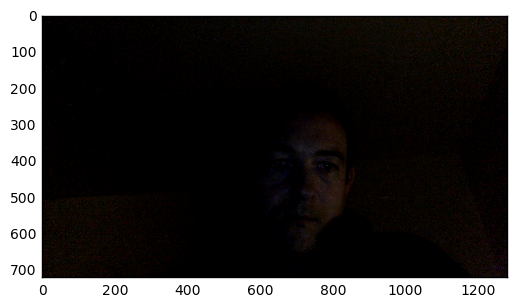

In [4]:
if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False
    print('Noting')